# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:38:07.654124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:38:11.080759
2025-04-14 20:38:11.080759


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 453
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:38:04"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

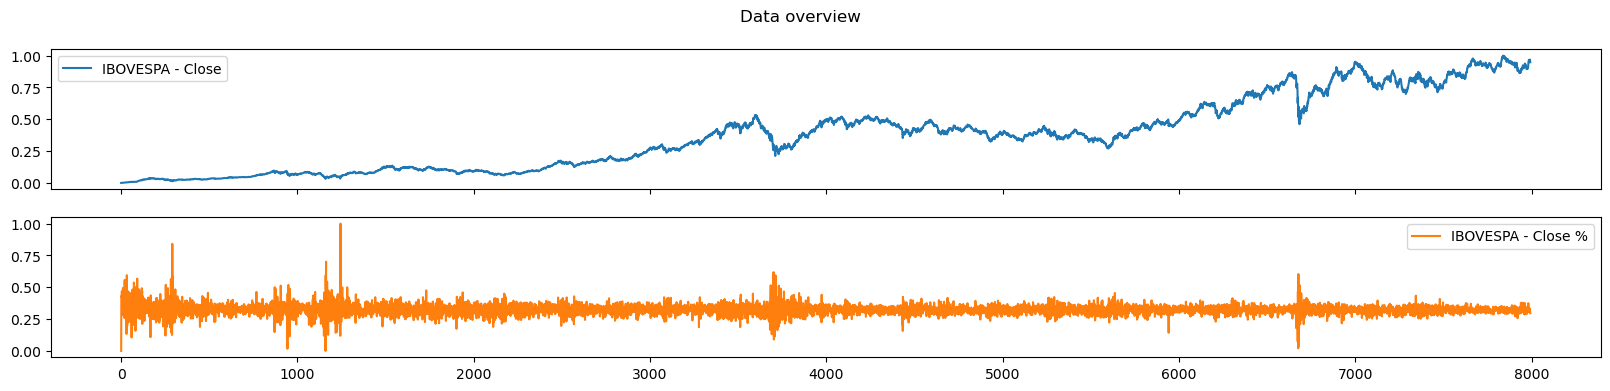

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

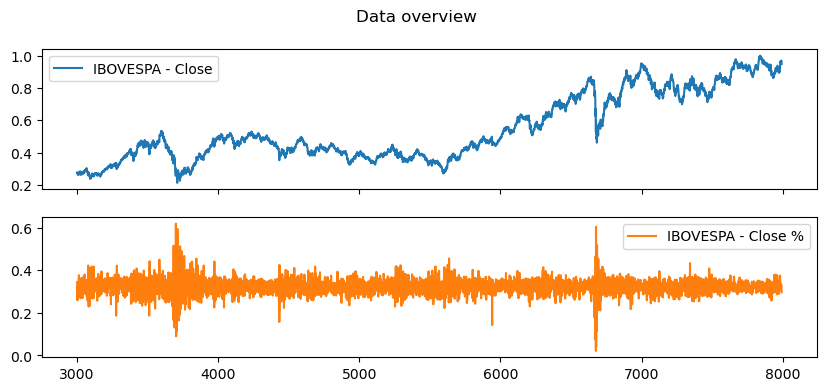

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

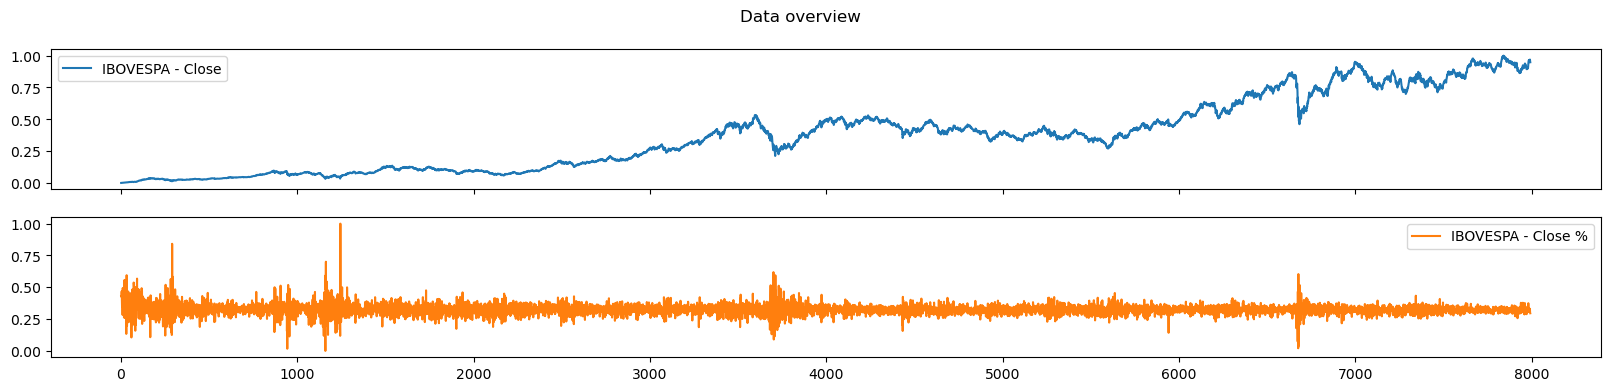

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

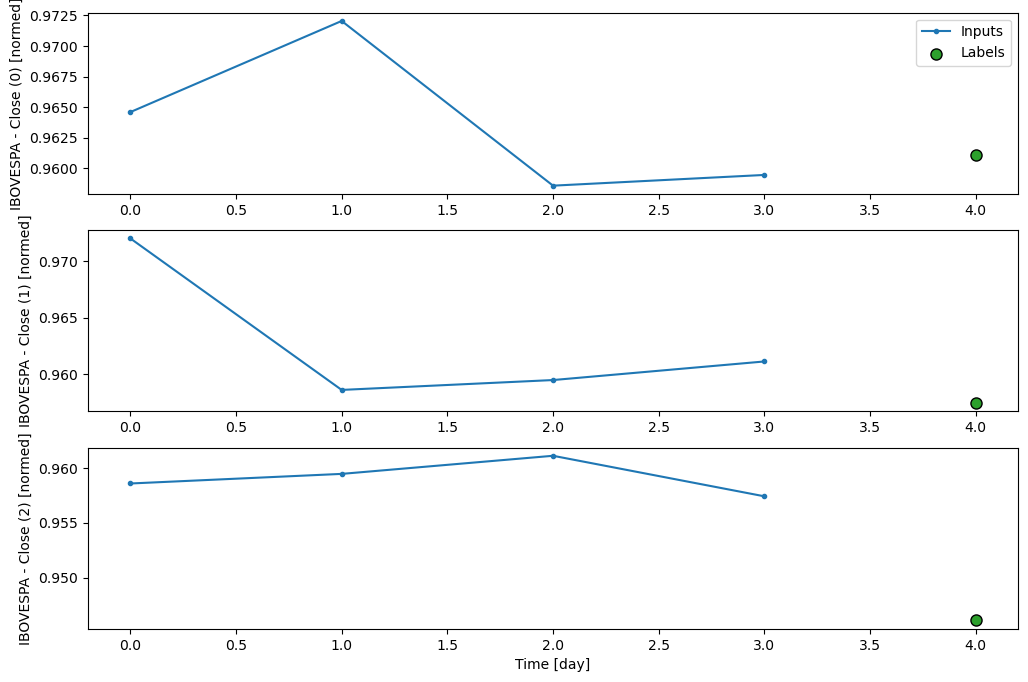

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 23:14 6s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 68.2587 - mean_squared_error: 6.4228e-05 - root_mean_squared_error: 0.0076   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 60.6917 - mean_squared_error: 9.0160e-05 - root_mean_squared_error: 0.0091

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 53.2403 - mean_squared_error: 9.1387e-05 - root_mean_squared_error: 0.0093

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 48.2998 - mean_squared_error: 9.2310e-05 - root_mean_squared_error: 0.0094

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 44.3433 - mean_squared_error: 1.0016e-04 - root_mean_squared_error: 0.0098

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 42.1542 - mean_squared_error: 1.0738e-04 - root_mean_squared_error: 0.0102

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 40.6733 - mean_squared_error: 1.1707e-04 - root_mean_squared_error: 0.0106

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.6136 - mean_squared_error: 1.3179e-04 - root_mean_squared_error: 0.0112

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 36.4411 - mean_squared_error: 1.4490e-04 - root_mean_squared_error: 0.0117

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 34.7553 - mean_squared_error: 1.5943e-04 - root_mean_squared_error: 0.0123

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 33.7488 - mean_squared_error: 1.8590e-04 - root_mean_squared_error: 0.0131

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 32.6104 - mean_squared_error: 2.1618e-04 - root_mean_squared_error: 0.0140

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 31.6971 - mean_squared_error: 2.5051e-04 - root_mean_squared_error: 0.0149

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 30.9006 - mean_squared_error: 3.1333e-04 - root_mean_squared_error: 0.0163

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 30.2017 - mean_squared_error: 3.9519e-04 - root_mean_squared_error: 0.0179

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 29.6705 - mean_squared_error: 6.0450e-04 - root_mean_squared_error: 0.0206

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 29.2028 - mean_squared_error: 8.3421e-04 - root_mean_squared_error: 0.0235

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 28.7542 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0259    

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 28.3222 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0281

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 27.9121 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0300

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 27.5625 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0316

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 27.1921 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0331

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 26.8503 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0346

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 26.5197 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0359

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 26.1610 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0374

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 25.8634 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0388

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 25.5756 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0402

238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 25.3241 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0413 - val_loss: 0.1952 - val_mean_absolute_error: 0.1952 - val_mean_absolute_percentage_error: 20.9688 - val_mean_squared_error: 0.0396 - val_root_mean_squared_error: 0.1990 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7117 - mean_absolute_error: 0.7117 - mean_absolute_percentage_error: 30686.2324 - mean_squared_error: 0.5065 - root_mean_squared_error: 0.7117

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6775 - mean_absolute_error: 0.6775 - mean_absolute_percentage_error: 12850.0078 - mean_squared_error: 0.4609 - root_mean_squared_error: 0.6784 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6174 - mean_absolute_error: 0.6174 - mean_absolute_percentage_error: 9055.7021 - mean_squared_error: 0.3982 - root_mean_squared_error: 0.6282 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5522 - mean_absolute_error: 0.5522 - mean_absolute_percentage_error: 7166.2905 - mean_squared_error: 0.3428 - root_mean_squared_error: 0.5789

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4908 - mean_absolute_error: 0.4908 - mean_absolute_percentage_error: 5886.0435 - mean_squared_error: 0.2958 - root_mean_squared_error: 0.5330

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 5102.1719 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4993

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 4520.5425 - mean_squared_error: 0.2381 - root_mean_squared_error: 0.4712

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3792 - mean_absolute_error: 0.3792 - mean_absolute_percentage_error: 4114.8345 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4499

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 3821.1414 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4335

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 3505.8826 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4150

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 3270.5842 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4004

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 3115.9421 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3905

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 3021.6013 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3843

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 2830.9104 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3714

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 2665.1541 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3598

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 2519.7776 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3496

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 2377.5906 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3393

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 2264.0076 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3309

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2283 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 2151.1118 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3222

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 2059.6306 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3151

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1976.3583 - mean_squared_error: 0.1139 - root_mean_squared_error: 0.3084

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 1900.2087 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.3021

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 1830.2878 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2963

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 1765.8484 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2909

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 1706.2407 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2858

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 1650.9291 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2812

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 1599.4351 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2767

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 1546.2150 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2721

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 1531.0134 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2708 - val_loss: 0.1421 - val_mean_absolute_error: 0.1421 - val_mean_absolute_percentage_error: 15.2197 - val_mean_squared_error: 0.0217 - val_root_mean_squared_error: 0.1472 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6768 - mean_absolute_error: 0.6768 - mean_absolute_percentage_error: 29183.5020 - mean_squared_error: 0.4581 - root_mean_squared_error: 0.6768

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6522 - mean_absolute_error: 0.6522 - mean_absolute_percentage_error: 12259.6465 - mean_squared_error: 0.4265 - root_mean_squared_error: 0.6528 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6144 - mean_absolute_error: 0.6144 - mean_absolute_percentage_error: 8718.0918 - mean_squared_error: 0.3827 - root_mean_squared_error: 0.6171 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5621 - mean_absolute_error: 0.5621 - mean_absolute_percentage_error: 6817.7632 - mean_squared_error: 0.3349 - root_mean_squared_error: 0.5745

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5138 - mean_absolute_error: 0.5138 - mean_absolute_percentage_error: 5755.7075 - mean_squared_error: 0.2977 - root_mean_squared_error: 0.5382

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4721 - mean_absolute_error: 0.4721 - mean_absolute_percentage_error: 5010.2432 - mean_squared_error: 0.2678 - root_mean_squared_error: 0.5071

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 4452.9014 - mean_squared_error: 0.2435 - root_mean_squared_error: 0.4806

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4020 - mean_absolute_error: 0.4020 - mean_absolute_percentage_error: 3975.9790 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4554

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 3669.5146 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4379

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3536 - mean_absolute_error: 0.3536 - mean_absolute_percentage_error: 3353.3860 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4187

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 3116.5925 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4035

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 2893.5991 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3884

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 2721.1853 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3763

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 2570.1870 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3653

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 2436.7642 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3553

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 2317.8833 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3462

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2549 - mean_absolute_error: 0.2549 - mean_absolute_percentage_error: 2211.2229 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3378

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 2125.1460 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3308

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 2027.4532 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3227

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2325 - mean_absolute_error: 0.2325 - mean_absolute_percentage_error: 1964.7793 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3174

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 1882.3492 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3103

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1814.4532 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3044

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1751.7733 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2988

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1693.7002 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2935

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1639.7493 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.2887

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 1589.4652 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2841

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 1537.4409 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2793

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1929 - mean_absolute_error: 0.1929 - mean_absolute_percentage_error: 1532.4535 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2788 - val_loss: 0.1211 - val_mean_absolute_error: 0.1211 - val_mean_absolute_percentage_error: 12.9426 - val_mean_squared_error: 0.0161 - val_root_mean_squared_error: 0.1270 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5059 - mean_absolute_error: 0.5059 - mean_absolute_percentage_error: 21825.6973 - mean_squared_error: 0.2559 - root_mean_squared_error: 0.5059

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 9119.1270 - mean_squared_error: 0.2299 - root_mean_squared_error: 0.4791  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4367 - mean_absolute_error: 0.4367 - mean_absolute_percentage_error: 6429.2412 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4427

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3905 - mean_absolute_error: 0.3905 - mean_absolute_percentage_error: 5088.2417 - mean_squared_error: 0.1695 - root_mean_squared_error: 0.4066

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3500 - mean_absolute_error: 0.3500 - mean_absolute_percentage_error: 4252.4395 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3765

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 3674.7427 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3518

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 3248.7473 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3315

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 2920.1055 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.3143

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 2684.5161 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.3012

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 2465.4453 - mean_squared_error: 0.0927 - root_mean_squared_error: 0.2883

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 2282.7959 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2770

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 2127.9226 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2670

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 1994.7275 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2580

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 1866.8611 - mean_squared_error: 0.0720 - root_mean_squared_error: 0.2491

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1766.3815 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2419

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 1677.2029 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2354

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1597.4480 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2293

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 1525.6521 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2237

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 1460.6433 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2186

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1401.4796 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2138

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1438 - mean_absolute_error: 0.1438 - mean_absolute_percentage_error: 1347.3854 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2093

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 1297.7124 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2051

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 1251.9167 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2012

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 1209.5488 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.1975

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1287 - mean_absolute_error: 0.1287 - mean_absolute_percentage_error: 1166.0507 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1938

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1258 - mean_absolute_error: 0.1258 - mean_absolute_percentage_error: 1129.7515 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1907

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1231 - mean_absolute_error: 0.1231 - mean_absolute_percentage_error: 1095.8569 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1878

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1222 - mean_absolute_error: 0.1222 - mean_absolute_percentage_error: 1085.0596 - mean_squared_error: 0.0437 - root_mean_squared_error: 0.1868 - val_loss: 0.0880 - val_mean_absolute_error: 0.0880 - val_mean_absolute_percentage_error: 9.3802 - val_mean_squared_error: 0.0089 - val_root_mean_squared_error: 0.0944 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.3813 - mean_absolute_error: 0.3813 - mean_absolute_percentage_error: 16455.5527 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3813

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3576 - mean_absolute_error: 0.3576 - mean_absolute_percentage_error: 6864.8379 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3585  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 4803.7495 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.3250

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 3867.9106 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2980

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 3151.0859 - mean_squared_error: 0.0781 - root_mean_squared_error: 0.2723

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 2720.6633 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2541

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 2404.3525 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2392

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1938 - mean_absolute_error: 0.1938 - mean_absolute_percentage_error: 2160.9875 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2269

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1986.6448 - mean_squared_error: 0.0526 - root_mean_squared_error: 0.2174

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1714 - mean_absolute_error: 0.1714 - mean_absolute_percentage_error: 1824.5176 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2081

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 1689.4246 - mean_squared_error: 0.0454 - root_mean_squared_error: 0.1999

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 1563.2308 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1920

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1466.3162 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1856

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1381.9028 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1800

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 1307.6367 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1749

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 1234.8696 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1698

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 1176.6384 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1656

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 1129.7473 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1622

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 1081.7007 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1585

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 1037.9641 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1552

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1107 - mean_absolute_error: 0.1107 - mean_absolute_percentage_error: 997.9670 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1520 

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 961.2372 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1490

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 927.3712 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1463

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 896.0341 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1436

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 866.9526 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1412

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 839.8853 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1389

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 811.9136 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1366

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 803.9239 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1359 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360 - val_mean_absolute_percentage_error: 3.8191 - val_mean_squared_error: 0.0016 - val_root_mean_squared_error: 0.0406 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3478 - mean_absolute_error: 0.3478 - mean_absolute_percentage_error: 15010.5029 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3478

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3207 - mean_absolute_error: 0.3207 - mean_absolute_percentage_error: 6231.5400 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.3217  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 4355.0000 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2907

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 3424.4126 - mean_squared_error: 0.0721 - root_mean_squared_error: 0.2638

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 2855.8120 - mean_squared_error: 0.0626 - root_mean_squared_error: 0.2438

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 2466.5769 - mean_squared_error: 0.0555 - root_mean_squared_error: 0.2278

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 2180.6130 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2148

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 1960.5021 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.2039

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1660 - mean_absolute_error: 0.1660 - mean_absolute_percentage_error: 1785.2297 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1946

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 1627.8311 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1858

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1522.5850 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1796

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1458 - mean_absolute_error: 0.1458 - mean_absolute_percentage_error: 1475.4650 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1768

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 1410.6021 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1728

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 1351.7959 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1690

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 1306.8021 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1661

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1273.1393 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1639

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1241.3589 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1618

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 1204.0436 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1593

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1175.9470 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1573

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1149.2717 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1555

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 1117.7596 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1533

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 1082.3916 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1508

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1049.4247 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1484

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1013.6722 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1457

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1103 - mean_absolute_error: 0.1103 - mean_absolute_percentage_error: 985.1090 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1436 

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 949.6906 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1409

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 920.9342 - mean_squared_error: 0.0232 - root_mean_squared_error: 0.1387

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 894.0505 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1366

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 872.3568 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1349

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0996 - mean_absolute_error: 0.0996 - mean_absolute_percentage_error: 848.4774 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1330

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 829.1311 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1314

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 810.7354 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1299

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 793.2233 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1285

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 776.5301 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1271

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 760.5966 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1258

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 742.8972 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1244

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0908 - mean_absolute_error: 0.0908 - mean_absolute_percentage_error: 733.1910 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1236 - val_loss: 0.0193 - val_mean_absolute_error: 0.0193 - val_mean_absolute_percentage_error: 2.0851 - val_mean_squared_error: 5.9984e-04 - val_root_mean_squared_error: 0.0245 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.4521 - mean_absolute_error: 0.4521 - mean_absolute_percentage_error: 19514.4395 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4521

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4201 - mean_absolute_error: 0.4201 - mean_absolute_percentage_error: 8546.5381 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.4212  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3845 - mean_absolute_error: 0.3845 - mean_absolute_percentage_error: 6051.8535 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3886

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3416 - mean_absolute_error: 0.3416 - mean_absolute_percentage_error: 4692.2324 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3543

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 3952.7639 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3295

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 3382.1946 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.3070

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 3009.8442 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2904

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2421 - mean_absolute_error: 0.2421 - mean_absolute_percentage_error: 2719.0645 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2763

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2267 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 2484.9497 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2641

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 2270.0762 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2522

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 2093.0217 - mean_squared_error: 0.0658 - root_mean_squared_error: 0.2419

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 1959.5795 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2337

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 1830.4193 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2256

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 1730.4995 - mean_squared_error: 0.0554 - root_mean_squared_error: 0.2190

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1631.6149 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2123

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1585 - mean_absolute_error: 0.1585 - mean_absolute_percentage_error: 1553.6635 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2069

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1500.4060 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2031

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1490 - mean_absolute_error: 0.1490 - mean_absolute_percentage_error: 1435.3787 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1983

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 1369.2899 - mean_squared_error: 0.0446 - root_mean_squared_error: 0.1934

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1386 - mean_absolute_error: 0.1386 - mean_absolute_percentage_error: 1309.5925 - mean_squared_error: 0.0428 - root_mean_squared_error: 0.1888

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 1255.3716 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1846

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 1227.3365 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1823

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1298 - mean_absolute_error: 0.1298 - mean_absolute_percentage_error: 1205.8851 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1806

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 1180.2075 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1785

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 1160.5181 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1769

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 1141.5403 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1753

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 1123.2351 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1738

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 1105.5663 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1723

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 1088.4999 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1709

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1189 - mean_absolute_error: 0.1189 - mean_absolute_percentage_error: 1080.1827 - mean_squared_error: 0.0358 - root_mean_squared_error: 0.1702

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 1072.0044 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1695

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 1063.9618 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1688

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1052.1454 - mean_squared_error: 0.0349 - root_mean_squared_error: 0.1677

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 1040.6152 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1668

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1025.6691 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1655

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1007.6402 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1639

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 986.9072 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1621 

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 960.6808 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1598

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 954.3695 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1592 - val_loss: 0.0314 - val_mean_absolute_error: 0.0314 - val_mean_absolute_percentage_error: 3.3347 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0357 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 13876.8027 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.3215

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3032 - mean_absolute_error: 0.3032 - mean_absolute_percentage_error: 6469.9849 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.3037   

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2807 - mean_absolute_error: 0.2807 - mean_absolute_percentage_error: 4627.1689 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2831

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 3802.0857 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2648

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 3178.7332 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2463

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 2751.5415 - mean_squared_error: 0.0561 - root_mean_squared_error: 0.2315

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 2476.9280 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2208

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1888 - mean_absolute_error: 0.1888 - mean_absolute_percentage_error: 2225.6584 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2100

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 2025.8590 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.2007

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 1862.6514 - mean_squared_error: 0.0405 - root_mean_squared_error: 0.1926

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 1726.4946 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1854

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1503 - mean_absolute_error: 0.1503 - mean_absolute_percentage_error: 1595.9010 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1782

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 1473.1624 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1711

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 1369.7822 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1648

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 1290.5608 - mean_squared_error: 0.0292 - root_mean_squared_error: 0.1598

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 1220.9001 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1552

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 1144.7407 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1501

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 1090.9939 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1463

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 1036.8378 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1424

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 993.4576 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1392 

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 949.2139 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1359

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 909.1190 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1328

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 868.7395 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1296

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 835.6376 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1270

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 801.9722 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1242

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 774.1298 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1218

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 748.3389 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1197

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 724.3786 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1176

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 702.0540 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1157

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 681.1969 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1139

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 678.9672 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1137 - val_loss: 0.0428 - val_mean_absolute_error: 0.0428 - val_mean_absolute_percentage_error: 4.5647 - val_mean_squared_error: 0.0021 - val_root_mean_squared_error: 0.0462 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.2479 - mean_absolute_error: 0.2479 - mean_absolute_percentage_error: 10706.4941 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2479

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 5323.2373 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2332  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 3829.9231 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2163

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 2972.2275 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1973

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 2585.4958 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1861

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1615 - mean_absolute_error: 0.1615 - mean_absolute_percentage_error: 2205.1833 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1740

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 1933.5031 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1640

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1728.8812 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1558

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1318 - mean_absolute_error: 0.1318 - mean_absolute_percentage_error: 1568.0123 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1488

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 1421.0870 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1420

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1160 - mean_absolute_error: 0.1160 - mean_absolute_percentage_error: 1276.1570 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1348

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1101 - mean_absolute_error: 0.1101 - mean_absolute_percentage_error: 1171.7950 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1295

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 1076.4164 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1244

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 1011.7665 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1208

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 948.6568 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1172 

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 893.7281 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1138

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 845.4434 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1108

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 802.6191 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1080

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 764.3493 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1054

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 729.9258 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1030

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 698.7791 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1008

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 670.4468 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0988

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 644.5532 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0968

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 625.8969 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0954

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 603.5958 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0937

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 582.9818 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0921

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 563.8653 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0906

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 546.0879 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 529.5118 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0878

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 515.6883 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867 - val_loss: 0.0387 - val_mean_absolute_error: 0.0387 - val_mean_absolute_percentage_error: 4.1200 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0424 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 12267.1025 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2838

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 5357.2134 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2618  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2254 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 3526.9858 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2315

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 2704.8428 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2071

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1722 - mean_absolute_error: 0.1722 - mean_absolute_percentage_error: 2223.4390 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1894

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1573 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 1929.9233 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1771

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1492 - mean_absolute_error: 0.1492 - mean_absolute_percentage_error: 1778.3632 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1702

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 1671.1244 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1651

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1378 - mean_absolute_error: 0.1378 - mean_absolute_percentage_error: 1577.6877 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1605

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 1480.0544 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1555

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1270 - mean_absolute_error: 0.1270 - mean_absolute_percentage_error: 1395.2694 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1509

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 1309.4192 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1463

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1255.0317 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1433

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1164 - mean_absolute_error: 0.1164 - mean_absolute_percentage_error: 1215.0449 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1411

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 1177.8110 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1389

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1114 - mean_absolute_error: 0.1114 - mean_absolute_percentage_error: 1134.7028 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1364

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 1118.4283 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1354

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1087.3925 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1335

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 1044.2748 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1308

119/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1004.8198 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1283

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 962.8101 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1256 

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 924.5409 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1231

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 894.3320 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1211

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 861.7510 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1189

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 835.8519 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1172

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 807.7363 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1152

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 781.6385 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1133

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 757.3423 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1116

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 734.6615 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1099

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 716.3835 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1085

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 699.0839 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1071

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 685.3572 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1061

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 672.2138 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1050

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 654.7214 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1037

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 638.2080 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1023

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 624.7701 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1012

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 611.9448 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1002

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 597.6981 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0991

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 589.8854 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0984 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337 - val_mean_absolute_percentage_error: 3.5813 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0374 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 11540.8301 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2672

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 5745.6699 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2528   

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 3977.8630 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2338

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 3136.1924 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2152

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 2618.7417 - mean_squared_error: 0.0414 - root_mean_squared_error: 0.1997

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1760 - mean_absolute_error: 0.1760 - mean_absolute_percentage_error: 2308.9353 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1893

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1634 - mean_absolute_error: 0.1634 - mean_absolute_percentage_error: 2038.4133 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1789

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1857.8451 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1713

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1450 - mean_absolute_error: 0.1450 - mean_absolute_percentage_error: 1688.0333 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1637

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1567.9736 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1579

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1319 - mean_absolute_error: 0.1319 - mean_absolute_percentage_error: 1465.7264 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1527

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1377.3971 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1480

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 1300.3057 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1438

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 1232.3359 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1399

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1162.4498 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1358

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 1100.8789 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1321

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 1046.1622 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1286

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 997.1694 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1255 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0973 - mean_absolute_error: 0.0973 - mean_absolute_percentage_error: 953.0290 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1226

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0940 - mean_absolute_error: 0.0940 - mean_absolute_percentage_error: 907.6151 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1195

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 871.6397 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1170

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 838.6899 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1146

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 808.3899 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1125

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 780.4185 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1104

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 754.5084 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1084

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 730.4320 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1066

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 707.9945 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1048

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 687.0303 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1032

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 664.6915 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1014

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 646.4207 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0999

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 629.2260 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0985

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 613.0118 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0971

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 599.8308 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0960

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 585.2241 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0948

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 567.5617 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0934

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 558.2524 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0926 - val_loss: 0.0161 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 1.7624 - val_mean_squared_error: 4.5654e-04 - val_root_mean_squared_error: 0.0214 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 11226.7832 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2599

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2390 - mean_absolute_error: 0.2390 - mean_absolute_percentage_error: 4657.1934 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2398  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 3257.6191 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2172

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 2562.7866 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.1973

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 2176.7576 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1839

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 1874.2748 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1716

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 1653.3851 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1617

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1331 - mean_absolute_error: 0.1331 - mean_absolute_percentage_error: 1483.9268 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1533

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 1349.3257 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1462

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1239.5181 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1400

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1110 - mean_absolute_error: 0.1110 - mean_absolute_percentage_error: 1148.0151 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1346

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1070.4139 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1298

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 1003.6949 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1256

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 951.6959 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1222 

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 899.9387 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1188

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 858.9255 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1160

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 817.4795 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1131

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 780.2352 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1105

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 746.5624 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1080

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 715.9553 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1057

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 688.0016 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1036

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 662.3601 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1015

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 636.2343 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0994

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 619.2591 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0981

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 598.8491 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0964

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 579.8726 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0948

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 560.2869 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0932

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 547.4266 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0921 - val_loss: 0.0358 - val_mean_absolute_error: 0.0358 - val_mean_absolute_percentage_error: 3.8185 - val_mean_squared_error: 0.0015 - val_root_mean_squared_error: 0.0389 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 9607.2168 - mean_squared_error: 0.0494 - root_mean_squared_error: 0.2223

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 3957.7073 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.2002 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1720 - mean_absolute_error: 0.1720 - mean_absolute_percentage_error: 2744.7356 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1778

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 2256.1292 - mean_squared_error: 0.0279 - root_mean_squared_error: 0.1638

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 1859.0399 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1507

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1268 - mean_absolute_error: 0.1268 - mean_absolute_percentage_error: 1594.0148 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1405

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1193 - mean_absolute_error: 0.1193 - mean_absolute_percentage_error: 1440.3418 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1341

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1146 - mean_absolute_error: 0.1146 - mean_absolute_percentage_error: 1349.6339 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1300

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 1215.2991 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1237

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1015 - mean_absolute_error: 0.1015 - mean_absolute_percentage_error: 1108.1616 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1183

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 1020.6890 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1138

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 947.5015 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1099 

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 885.1639 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1064

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 831.3253 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1033

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 784.3024 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1004

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 742.8391 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0978

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 705.9694 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0954

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 672.9488 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0931

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 643.1859 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0911

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 619.0766 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0893

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 596.8879 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0877

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 576.3917 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0862

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 557.3948 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0848

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 535.5097 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0831

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 517.3743 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0816

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 498.7508 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0801

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 483.2129 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0789

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 468.7107 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0777

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 461.0652 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0771 - val_loss: 0.0300 - val_mean_absolute_error: 0.0300 - val_mean_absolute_percentage_error: 3.1890 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0339 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 9535.1475 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2206

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 4153.5405 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.2014 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1713 - mean_absolute_error: 0.1713 - mean_absolute_percentage_error: 2725.6868 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1769

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 2136.4968 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1597

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 1778.5442 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1472

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 1534.9041 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1375

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 1339.3848 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1290

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 1205.8975 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1226

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 1099.3948 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1172

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 1012.4215 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1127

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 939.6470 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1087 

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 884.1078 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1056

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 829.7455 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1024

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 782.3326 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0994

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 740.5782 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0968

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 703.4896 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0943

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 670.2989 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0920

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 640.4062 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0899

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 616.2098 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0882

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 591.2979 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0864

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 568.5198 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0847

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 547.6061 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0831

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 528.3276 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0816

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 510.4919 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0801

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 493.9380 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0788

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 478.5306 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0776

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 464.1523 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0764

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 456.5729 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0758 - val_loss: 0.0146 - val_mean_absolute_error: 0.0146 - val_mean_absolute_percentage_error: 1.5831 - val_mean_squared_error: 3.6200e-04 - val_root_mean_squared_error: 0.0190 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 9192.4336 - mean_squared_error: 0.0452 - root_mean_squared_error: 0.2127

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 4009.8469 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1949 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 2635.4578 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1717

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 2020.2975 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1536

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 1660.8582 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1407

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1174 - mean_absolute_error: 0.1174 - mean_absolute_percentage_error: 1442.2593 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1317

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1091 - mean_absolute_error: 0.1091 - mean_absolute_percentage_error: 1280.0981 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1245

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 1154.4712 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1185

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 1043.9716 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1128

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 963.2891 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1086 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 895.4578 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1048

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 843.5151 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1018

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 787.2972 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0984

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 743.3746 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0957

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 704.5914 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0932

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 670.0494 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0908

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 639.0683 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0887

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 611.1042 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0867

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 585.7219 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0849

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 562.5671 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0832

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 543.6198 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0817

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 523.9213 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0802

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 505.7375 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 488.8951 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0774

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 473.2500 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0761

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 457.1151 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0748

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 443.5980 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0737

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 442.1529 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0736 - val_loss: 0.0266 - val_mean_absolute_error: 0.0266 - val_mean_absolute_percentage_error: 2.8352 - val_mean_squared_error: 8.5983e-04 - val_root_mean_squared_error: 0.0293 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 8276.0469 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1914

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 3829.9949 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1760 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 2613.2756 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1577

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1324 - mean_absolute_error: 0.1324 - mean_absolute_percentage_error: 1983.7152 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1407

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1184 - mean_absolute_error: 0.1184 - mean_absolute_percentage_error: 1623.6924 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1289

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 1386.5508 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1200

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0998 - mean_absolute_error: 0.0998 - mean_absolute_percentage_error: 1216.7625 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1130

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0934 - mean_absolute_error: 0.0934 - mean_absolute_percentage_error: 1088.2487 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1073

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 987.2377 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1024 

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 905.5417 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0984

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 837.9196 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0950

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 780.7428 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0919

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 731.6434 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0892

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 693.4235 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0869

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 655.4099 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0846

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 621.7583 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0825

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 594.9069 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0807

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 573.4391 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0793

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 556.3608 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 537.8083 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0768

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 522.9634 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0758

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 508.9995 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0747

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 493.7164 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0736

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 481.4022 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0727

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 467.8675 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0717

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 456.9189 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0708

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 443.1720 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0697

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 428.7588 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0686

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 415.3443 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0675

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 402.8258 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0665

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 394.9361 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0658 - val_loss: 0.0240 - val_mean_absolute_error: 0.0240 - val_mean_absolute_percentage_error: 2.5503 - val_mean_squared_error: 7.5221e-04 - val_root_mean_squared_error: 0.0274 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 8723.6602 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.2017

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 3810.1335 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1857 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 2777.8740 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1706

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1519 - mean_absolute_error: 0.1519 - mean_absolute_percentage_error: 2291.9351 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1584

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1924.3336 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1472

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 1701.6698 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1396

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 1531.1560 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1331

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1437.6466 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1293

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1337.5548 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1251

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 1236.4965 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1205

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 1151.3375 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1165

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 1078.4446 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1128

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1005.5446 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1090

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 943.0214 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1056 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 888.6733 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1026

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 828.3010 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0990

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 781.8133 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0962

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 740.7798 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0936

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 699.9901 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0909

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 660.1427 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0883

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 631.7058 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0863

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 605.8589 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0845

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 582.2517 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0827

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 558.0119 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0809

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 535.9033 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0792

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 520.0013 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0780

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 505.1082 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0768

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 491.1283 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 477.9781 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0746

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 465.5825 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 453.8768 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0726

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 442.8027 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0717

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 432.3094 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0708

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 420.9725 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0698 - val_loss: 0.0207 - val_mean_absolute_error: 0.0207 - val_mean_absolute_percentage_error: 2.1961 - val_mean_squared_error: 5.7147e-04 - val_root_mean_squared_error: 0.0239 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 8232.6709 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1903

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1757 - mean_absolute_error: 0.1757 - mean_absolute_percentage_error: 3817.2917 - mean_squared_error: 0.0312 - root_mean_squared_error: 0.1764  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 2712.0046 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1613

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1457 - mean_absolute_error: 0.1457 - mean_absolute_percentage_error: 2283.4553 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1511

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1848.1093 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1384

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1214 - mean_absolute_error: 0.1214 - mean_absolute_percentage_error: 1628.5588 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1312

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 1461.4796 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1250

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1310.1492 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1190

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 1190.6140 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1139

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1081.0013 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1088

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 992.0967 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1045 

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 918.4627 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1007

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 878.4879 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0987

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 822.0758 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0957

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 767.5707 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0926

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 720.5496 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0899

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 688.1809 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0879

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 654.9445 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0858

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 625.0969 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0839

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 598.1228 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0821

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 570.7074 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0802

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 548.5750 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0786

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 525.8424 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0770

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 505.1025 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0754

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 486.0953 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0740

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 468.6048 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0726

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 452.4518 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0713

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 437.4828 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 423.5684 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0690

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 410.5975 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 397.1793 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668 - val_loss: 0.0225 - val_mean_absolute_error: 0.0225 - val_mean_absolute_percentage_error: 2.3956 - val_mean_squared_error: 6.4960e-04 - val_root_mean_squared_error: 0.0255 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 7841.1367 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1812

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 3232.9670 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1637 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 2242.9241 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1455

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 1759.0270 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1315

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 1465.3809 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1217

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1265.5562 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1139

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 1105.0797 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1071

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - mean_absolute_percentage_error: 995.4068 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1020 

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 907.7789 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0976

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 836.0633 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0938

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 776.0281 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0905

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 724.9014 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0875

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 685.3581 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0851

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 650.3354 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0829

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 615.4152 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0807

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 584.4243 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0786

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 553.8100 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0765

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 526.5536 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0746

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 502.1100 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 482.1610 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0713

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 465.8440 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0701

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 460.0355 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0696

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 452.5357 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0690

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 447.0861 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0686

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 438.3194 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 426.6658 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0670

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 415.6768 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0661

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 409.6740 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0656

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 402.4344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0650

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 396.8432 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0645

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 390.0911 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 384.8694 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0635

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 377.3230 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0629 - val_loss: 0.0132 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 1.3978 - val_mean_squared_error: 2.6252e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 8073.3892 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1866

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 4014.1895 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1757  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1596 - mean_absolute_error: 0.1596 - mean_absolute_percentage_error: 2772.9683 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1614

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 2180.4167 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1477

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 1818.8007 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1369

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 1602.4003 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1296

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 1437.8344 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1234

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 1348.2023 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1198

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1288.8671 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1173

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1235.2511 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1150

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0985 - mean_absolute_error: 0.0985 - mean_absolute_percentage_error: 1156.3625 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1115

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 1101.0081 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1090

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 1039.8489 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1060

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 985.9221 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1034 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 929.1001 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1005

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 879.3767 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0979

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 842.3182 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0960

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 802.2356 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0938

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 760.5521 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0914

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 723.4294 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0893

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 690.1306 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0872

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 660.0811 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0854 

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 640.3494 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0841

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 614.8349 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0825 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 597.9514 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0814

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 579.0037 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0801

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 564.2036 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0791

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 547.5148 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0779 

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 529.3761 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0766

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 514.8556 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0755

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 498.9914 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 484.1731 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0732

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 478.1164 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 470.2969 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 459.0841 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0713

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 446.7282 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0703

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 436.7083 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0695

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 427.1735 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0687

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 416.6150 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0679

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 409.4194 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 403.8577 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0668

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 397.1360 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0663

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 390.6602 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0657 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0645 - val_mean_squared_error: 1.6031e-04 - val_root_mean_squared_error: 0.0127 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 7081.7490 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1636

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 3795.7224 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1549

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1413 - mean_absolute_error: 0.1413 - mean_absolute_percentage_error: 2637.4824 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1427 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 2156.7419 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1330

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 1790.1113 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1232 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1055 - mean_absolute_error: 0.1055 - mean_absolute_percentage_error: 1478.3467 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1137

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 1291.4905 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1071

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1152.3125 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1018

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1043.4598 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0973

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 955.6561 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0935 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 883.2840 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0902

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 830.4663 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0876

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 770.4944 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0847

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 725.5875 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0825

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 691.5516 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0808

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 660.9152 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0792

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 633.1692 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0777

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 607.9041 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0763

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 584.7919 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0749

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 560.2019 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0735

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 540.8924 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0723

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 525.8990 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0714

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 509.0851 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0703

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 495.9614 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0695

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 481.1725 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 465.1103 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0674

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 450.1947 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0664

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 436.3029 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0654

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 421.5461 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0643

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 406.2119 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0632

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 392.0637 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0621

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 377.5704 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 365.5041 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 354.2607 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 343.7561 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0583

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 340.4086 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0573 - val_mean_squared_error: 1.5766e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 6684.0742 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1543

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 2738.7795 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1365 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 1951.8638 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1212

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - mean_absolute_percentage_error: 1548.9868 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1098

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1273.9222 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1006

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 1164.0996 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0965

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 1126.0106 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0950

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - mean_absolute_percentage_error: 1057.7954 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0922

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 998.4281 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0897 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 934.0350 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0869

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 888.9505 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0848

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 829.9008 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0821

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 787.0305 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0800

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 756.1720 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0784

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 734.7728 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0773

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 708.2833 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0759

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 678.0549 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0742

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 650.5822 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0727

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 630.3312 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0716

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 611.4415 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0705

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 598.0830 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0697

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 581.2523 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0687

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 550.5662 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 520.0807 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0649

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 495.9624 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0634

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 474.1987 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0619

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 454.4502 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 434.2993 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0592

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 416.0294 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578 

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 399.3813 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 384.1420 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 371.6336 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 358.5938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 346.5255 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 334.1251 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 323.7717 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0508

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 313.0671 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 312.0411 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1014 - val_mean_squared_error: 1.7023e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 7765.1880 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1794

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 3205.3945 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1628 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1415 - mean_absolute_error: 0.1415 - mean_absolute_percentage_error: 2229.8647 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1456

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1750.3265 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1319

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 1458.9094 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1220

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 1260.2332 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1143

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1114.3632 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1079

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 1002.0104 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1026

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 912.4515 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0980 

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 839.2251 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0940

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 778.0803 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0905

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 726.1172 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0874

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 681.3322 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0846

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 638.2536 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0819

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 604.3497 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0796

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 574.2153 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0775

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 547.2333 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0756

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 522.9187 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0739

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 500.8795 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0722

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 478.6797 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0705

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 462.4251 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0693

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 449.1703 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0682

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 435.0135 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0671

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 421.8084 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0660

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 409.4590 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0650

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 397.8824 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0640

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 391.0066 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0634

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 385.6918 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0630

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 375.5270 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0621

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 374.2999 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0620 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9614 - val_mean_squared_error: 1.2900e-04 - val_root_mean_squared_error: 0.0114 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1544 - mean_absolute_error: 0.1544 - mean_absolute_percentage_error: 6696.2437 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1545

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 2905.3181 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1393 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 2029.3304 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1242

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - mean_absolute_percentage_error: 1557.0704 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1112

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 1282.2865 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1024

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1116.9379 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0964

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 980.6559 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0909 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 867.4764 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0860

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 812.7834 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0835

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 758.1587 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0809

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 717.6965 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0789

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 681.8496 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0772

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 639.8881 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0750

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 603.3194 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0730

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 567.3661 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0710

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 532.6261 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0689

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 505.1766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0673

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 483.2866 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0659

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 463.4062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0646

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 443.1032 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 424.6786 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0619

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 406.0986 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 390.8494 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0594

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 376.8154 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0584

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 362.4734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 351.8398 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 341.8744 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 332.5137 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0549

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 322.6372 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 319.4901 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9689 - val_mean_squared_error: 1.3142e-04 - val_root_mean_squared_error: 0.0115 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1481 - mean_absolute_error: 0.1481 - mean_absolute_percentage_error: 6420.7397 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1481

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 2784.1389 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1332 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1127 - mean_absolute_error: 0.1127 - mean_absolute_percentage_error: 1876.8972 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1169

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 1490.2660 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1060

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 1329.3801 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1009

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 1203.4702 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0965

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 1102.5182 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0927

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 989.6179 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0882 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 911.7003 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0848

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 846.4847 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0818

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 791.0137 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0791

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 743.1667 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0767

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 708.0022 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0749

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 676.4001 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0732

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 642.4301 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0713

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 616.9039 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0699

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 593.5469 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 556.1163 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0663

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 533.9444 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0649

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 510.4412 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0635

125/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 495.0158 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 475.0806 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0612

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 459.3565 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0601

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 444.7446 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 431.1273 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 418.4024 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0573

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 408.4162 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 397.1073 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0557

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 386.4701 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0550

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 376.4447 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 365.4507 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0534

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 353.7225 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 342.7966 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 336.3380 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0511

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 328.9341 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0505

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 321.8815 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0499

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 316.2542 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0495

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 310.8397 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 304.6060 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 300.6035 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9127 - val_mean_squared_error: 1.1590e-04 - val_root_mean_squared_error: 0.0108 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.1641 - mean_absolute_error: 0.1641 - mean_absolute_percentage_error: 7107.5254 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1641

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 2920.5649 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1468  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 2164.1836 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1336

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 1748.9941 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1223

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 1483.5732 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1141

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 1273.7076 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1067

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1138.9929 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1014

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 1033.1171 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0970

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 947.3614 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0931 

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 876.4214 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0898

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 816.5751 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0868

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 786.4457 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0853

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 733.1958 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0826

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 692.8368 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0805

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 657.1567 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0785

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 625.3478 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0767

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 592.9446 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 567.5129 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0732

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 544.4000 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0717

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 532.1081 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0709

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 512.0185 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0696

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 493.5442 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0683

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 478.8469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0673

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 465.0889 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0664

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 454.2757 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0656

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 444.0058 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0648

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 438.0871 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0644

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 434.2375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0641

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 432.3408 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0640

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 428.6019 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0637

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 423.1260 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0633

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 419.5608 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0630

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 417.8030 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0629

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 414.3360 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0626

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 412.6263 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0625

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 410.9321 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0624

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 409.2532 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0622

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 405.9407 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0620

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 402.6871 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0617

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 397.9135 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0614

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 396.3501 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 393.2636 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0610

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 388.7325 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0606

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 384.3153 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 374.4279 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0595

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 366.3898 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0588

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 358.7238 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0582

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 350.2159 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0575

238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 339.9127 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8685 - val_mean_squared_error: 1.0262e-04 - val_root_mean_squared_error: 0.0101 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1436 - mean_absolute_error: 0.1436 - mean_absolute_percentage_error: 6228.6758 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1437

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 2871.9011 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1308  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1154 - mean_absolute_error: 0.1154 - mean_absolute_percentage_error: 2029.3362 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1180

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1652.6451 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1084

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1443.4067 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1023

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 1287.4902 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0974

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 1165.4858 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0932

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 1067.6765 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0896

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 1001.8972 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0869

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 958.3079 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0851 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 918.8145 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0835

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 860.5793 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0809

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 819.6677 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0790

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 774.3302 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0768

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 741.9522 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0752

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 712.4802 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0737

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 672.9126 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0717

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 654.9285 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0707

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 616.9049 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0686

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 579.0648 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0665

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 546.0574 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0645

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 523.9208 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 506.9430 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0621

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 485.1370 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0607

131/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 462.6353 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 444.7617 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0581

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 430.6164 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 413.2373 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 401.1883 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 391.7254 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 382.7441 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 375.8806 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 370.9091 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 366.0811 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 359.8560 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 348.0816 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 335.8117 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 328.1483 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 319.6814 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0490

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 310.5764 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 300.9930 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 291.0828 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8173 - val_mean_squared_error: 8.9966e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 6824.2148 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1575

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 2661.7539 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1388 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 1880.4708 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1229

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1453.9838 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1103

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 1221.8822 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1022

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1076.7026 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0965

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 965.9177 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0918 

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 919.6434 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0898

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 898.3786 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0888

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 849.8150 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0865

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 806.8298 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0844

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 775.8842 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0828

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 734.2590 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0807

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 697.3775 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0788

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 675.0140 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0775

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 654.2029 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0764

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 634.7799 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0753

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 625.5435 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0747

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 599.5502 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0732

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 583.5178 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0722

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 572.1070 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0715

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 550.7181 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0702

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 527.9108 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0687

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 509.9677 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0676

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 496.0174 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0666

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 477.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0654

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 456.5531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0639 

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 437.2553 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 419.6802 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0612

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 403.6000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 390.4074 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0590

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 378.1337 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0580

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 366.6835 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 354.6838 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 344.7222 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 334.2284 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 325.4773 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0537 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0096 - val_mean_squared_error: 1.4195e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 6232.4229 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1437

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - mean_absolute_percentage_error: 3084.2205 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1335 

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 2427.5122 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1261

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 2036.9526 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1192

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 1766.8740 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1127

 22/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 1613.1797 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1085

 24/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - mean_absolute_percentage_error: 1527.1761 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1060

 27/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 1416.7343 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1027

 30/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1323.4702 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0999

 33/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 1243.2198 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0972

 36/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 1173.3448 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0948

 40/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 1093.6035 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0919

 46/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 994.9505 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0882 

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 926.9962 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0854

 57/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 858.1708 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0825

 64/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 791.2263 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0795

 69/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 750.1811 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0775

 73/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 720.6727 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0761

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 706.8990 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0754

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 687.3356 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0744

 83/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 657.3152 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0728

 90/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 619.9317 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0708

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 578.3262 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0685

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 546.2371 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0666

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 514.5616 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0647

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 489.6545 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

133/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 464.6589 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

142/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 442.3437 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 422.2841 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0587

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 404.1415 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0574

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 387.6449 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 372.5729 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 358.7425 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 346.0009 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531 

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 334.2218 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0522

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 323.2967 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0513

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 313.1327 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0505

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 302.6354 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 296.7040 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8939 - val_mean_squared_error: 1.1080e-04 - val_root_mean_squared_error: 0.0105 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1321 - mean_absolute_error: 0.1321 - mean_absolute_percentage_error: 5737.9824 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1322

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 2344.6982 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1162 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1614.2742 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.1016

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 1234.1621 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0906

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 1031.2212 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0836

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 892.1597 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0782 

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 789.6209 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0738

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 710.4758 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0702

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 647.3402 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 595.6740 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0643

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 552.4834 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 515.7429 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 480.7989 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 453.5564 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0560

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 429.5399 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0545

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 408.1838 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 391.0814 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 377.3673 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0510

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 366.4322 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0502

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 357.8411 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0496

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 344.9855 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0487

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 331.6902 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 319.4792 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0468

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 307.0242 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 297.8057 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 288.1390 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 278.1779 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 269.8398 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 267.1836 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7683 - val_mean_squared_error: 7.9437e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 5927.9697 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1366

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 2422.3242 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1202 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 1725.4771 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1066

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 1369.2583 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0966

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 1195.8234 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0911

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 1047.3820 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0858

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 935.7952 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0815 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 848.0987 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0778

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 768.0450 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0741

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 703.3533 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0710

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 649.8339 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0682

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 599.6019 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0656

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 557.3527 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 521.2401 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 489.9683 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0592

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 462.6002 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0575

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 440.9697 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0561

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 419.1631 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0546

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 399.6170 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 381.9859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0520

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 365.9923 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 351.4116 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 338.0586 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 324.4748 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 313.2385 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 302.8284 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 293.1540 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 284.1372 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 275.7131 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8540 - val_mean_squared_error: 1.0056e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.1388 - mean_absolute_error: 0.1388 - mean_absolute_percentage_error: 6024.6338 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1388

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 2467.0703 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1230  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1703.6735 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1082

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0912 - mean_absolute_error: 0.0912 - mean_absolute_percentage_error: 1334.1099 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0976

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 1110.5470 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0903

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 959.0784 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0847 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 848.0499 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0802

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 754.2687 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0760

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 687.7360 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0727

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 627.7336 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0696

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 582.9377 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0671

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 544.7403 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0649

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 511.7283 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0629

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 482.8808 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0611

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 457.4333 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 432.4312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0578

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 412.3825 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 394.2901 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0552

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 377.8712 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0540

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 362.8970 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0529

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 349.1787 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 335.2184 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 323.6669 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 312.9617 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0490

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 303.0106 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0482

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 293.7335 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 285.0641 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8531 - val_mean_squared_error: 1.0088e-04 - val_root_mean_squared_error: 0.0100 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1271 - mean_absolute_error: 0.1271 - mean_absolute_percentage_error: 5523.5615 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1271

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 2251.2305 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1111 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1498.9266 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0954

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1182.9799 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0863

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 988.5893 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0799 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 855.3466 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0748

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 757.0818 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0706

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 681.2017 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0671

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 620.6763 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 566.2247 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0613

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 534.0769 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 498.2802 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 467.4416 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0558

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 440.5663 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0541

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 416.9166 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 395.9205 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0513

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 377.1401 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 360.2313 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0489

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 344.9184 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 330.9788 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0468

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 318.2299 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 306.5202 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0450

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 296.8816 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 287.8895 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 279.4790 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 270.6423 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 262.4006 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 256.3652 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8265 - val_mean_squared_error: 9.4218e-05 - val_root_mean_squared_error: 0.0097 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 5253.1543 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1208

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 2141.1841 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1056 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 1521.5308 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0932

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 1178.6643 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0838

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 975.6011 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0774 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 839.0627 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0724

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 739.6336 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0684

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 663.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0650

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 603.1326 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0620

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 554.0291 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 509.0385 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0571

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 474.9865 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0552

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 451.8111 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 433.8590 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 417.4292 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 404.7621 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 390.6470 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 373.4436 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 355.9927 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0479

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 341.9300 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 329.0449 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 317.1912 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 307.5678 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 296.1038 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 286.6772 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 276.8347 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 267.7113 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 259.2284 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 250.4719 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 244.7223 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7806 - val_mean_squared_error: 8.3822e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0043


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 4918.2822 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1130

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1992.8737 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0970 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 1363.1055 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0836

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 1064.7532 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0753

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 884.7788 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0694 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 762.7948 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 673.7076 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0614

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 605.3936 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0584

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 551.0635 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 506.6693 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0537

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 469.6381 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 438.1831 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 411.0886 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0485

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 387.4771 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 368.8826 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 352.1660 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 337.0470 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 323.3005 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 310.7416 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 299.2173 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 288.6013 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 278.7869 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 269.6827 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 261.2118 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 252.3576 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0379

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 244.1423 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 236.4964 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 229.3608 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 225.5998 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7535 - val_mean_squared_error: 7.8162e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0042


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 5374.4878 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1237

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 2317.7839 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1096 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1673.1261 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0982

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 1235.0403 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0863

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 1015.8300 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0793

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 870.0448 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0739 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 764.7718 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0696

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 684.6511 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0660

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 621.4145 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0630

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 570.0270 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0603

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 527.3574 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 491.2592 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0560

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 457.0824 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 430.5378 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0524

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 407.2072 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0509

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 386.5163 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0496

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 368.0266 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 351.3939 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 336.3426 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 322.6505 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 308.8115 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 297.4295 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 285.8203 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0424

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 276.1939 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 266.3034 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 258.0459 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 249.5083 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 248.6900 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7113 - val_mean_squared_error: 6.8240e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0041


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 5626.2939 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1296

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 2295.4661 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1135 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 1581.6959 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0994

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 1237.3915 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0896

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 1029.4435 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0828

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 888.7134 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0777 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 785.6373 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0735

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 706.3588 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0700

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 643.2092 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0670

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 586.4573 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 544.1881 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 504.5280 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0596

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 477.1412 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0580

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 467.7050 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0574

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 458.6762 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0568

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 436.3958 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0554

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 414.0345 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 394.0735 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 376.1349 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 363.3845 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0505

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 351.5558 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0497

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 339.0391 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0488

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 326.0852 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0478

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 314.1795 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0469

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 303.1956 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 293.0275 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0452

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 283.5852 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 274.7905 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0438

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 265.6975 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 263.9601 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7546 - val_mean_squared_error: 7.8581e-05 - val_root_mean_squared_error: 0.0089 - lr: 0.0040


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 4918.8394 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1131

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 1888.8596 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0951 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 1279.5620 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0812

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 1016.4213 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0735

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 852.2660 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0679 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 738.9968 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0635

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 655.2749 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0601

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 590.5562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 538.7507 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 491.9898 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 457.0423 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 427.2137 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 401.4148 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 378.8581 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 358.9475 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0448

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 341.2261 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 325.3420 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 311.0136 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 303.6405 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 293.9452 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 283.6707 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 273.0205 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 262.1761 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 253.1976 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 245.7679 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 242.2307 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0367

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 237.1306 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 229.9095 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 224.6212 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7318 - val_mean_squared_error: 7.3635e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0039


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 5241.3096 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1206

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 2129.2944 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1043 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 1462.1088 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0906

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 1142.5902 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0815

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 949.8287 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0753 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 819.3167 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0705

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 723.7969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0666

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 650.4108 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0634

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 592.0143 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 544.3317 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0582

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 504.5522 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 470.7617 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0542

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 441.6494 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 413.6561 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 391.6278 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0495

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 372.0531 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 354.5318 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 338.7459 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0460

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 324.4406 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 312.8013 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 302.0496 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 290.8895 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 280.6039 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0418

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 270.0774 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0410

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 261.3217 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 253.1700 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 245.5599 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 242.3390 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0388 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7481 - val_mean_squared_error: 7.4362e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0038


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 4933.7568 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1134

  7/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 2422.0981 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1030 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 1653.4561 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0916

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 1289.6096 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0825

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 1049.2489 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0758

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 877.1243 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0704 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 782.4537 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0671

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 690.1569 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0636

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 619.5229 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0606

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 563.4545 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0580

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 513.1639 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 475.7899 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 444.0311 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 416.6610 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 390.3346 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 369.6103 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 351.1881 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 334.6928 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 319.8275 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 306.3539 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 294.0795 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 282.8460 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 272.5216 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 262.9967 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 253.2398 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 245.1176 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 237.5502 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 230.4809 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 228.9743 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7428 - val_mean_squared_error: 7.3197e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0037


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 4670.5342 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1072

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1890.3915 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0919 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 1252.5785 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0781

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 986.6167 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0704 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 823.3862 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0649

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 711.8310 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0607

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 622.0533 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0570

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 560.5977 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 511.4046 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 471.0188 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 437.1897 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0481

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 408.3696 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0465

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 383.4800 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 361.7453 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 342.5813 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 327.3400 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 311.8932 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 297.9786 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 288.0698 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 276.3520 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 265.6418 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 255.8102 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 248.7013 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 242.0157 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 233.9816 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 226.5152 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 219.5562 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 213.0544 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7942 - val_mean_squared_error: 8.7125e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0036


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 4908.7129 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1128

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1990.4583 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0971 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1365.2756 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0842

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 1067.0265 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0758

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 887.3199 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0702 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 765.8258 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0659

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 685.6685 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0629

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 622.5110 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 565.6058 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0578

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 519.5328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0557

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 481.2685 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0539

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 448.8402 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 420.9432 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0509

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 396.6545 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 375.2986 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 358.3511 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 343.0217 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0463

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 329.0829 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0455

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 316.3461 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 304.6567 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 291.3252 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 280.3846 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 270.3166 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 261.0180 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 254.2606 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 246.1213 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 237.7269 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 230.6947 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 229.1958 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7674 - val_mean_squared_error: 8.0528e-05 - val_root_mean_squared_error: 0.0090 - lr: 0.0035


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 4654.2900 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1068

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 1996.4994 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 1336.1318 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0806

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 1034.1276 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0724

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 855.9091 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0671 

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 736.5844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0631

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 658.3328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0602

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 596.8854 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0577

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 547.1865 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0556

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 501.3716 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 463.4533 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 431.4539 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0499

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 404.0244 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0483

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 380.2151 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 359.3354 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 340.8544 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0446

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 324.3662 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 309.5557 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0425

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 297.5938 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 285.3037 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 274.0878 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0400

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 263.8063 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 253.3376 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 244.6705 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 236.6347 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 229.1616 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 222.1917 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 216.3792 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7457 - val_mean_squared_error: 7.5418e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0034


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 4432.5571 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1017

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 1790.5828 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 1224.2222 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0746

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 955.4053 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0670 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 779.2295 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0612

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 673.6359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 588.6642 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0538

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 530.5065 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 483.9542 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 445.7339 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 410.4734 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 392.1490 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 365.3427 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 344.4720 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 324.1803 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 308.0537 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 293.6099 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 280.5900 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 268.7862 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 258.0311 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 248.1864 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 239.1368 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 229.8988 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 222.2327 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 215.1108 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 208.4749 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 202.2755 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 201.6128 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317 - val_loss: 0.0074 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 0.7895 - val_mean_squared_error: 8.6259e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0033


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 4517.8462 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1037

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 1825.6183 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 1249.0469 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0762

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 975.2989 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0686 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 810.4825 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0634

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 698.8568 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0594

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 617.1465 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0561

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 554.4385 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0534

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 504.5850 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0511

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 463.8469 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 429.8683 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0472

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 401.0115 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0457

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 376.1577 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0442

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 354.5037 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0429

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 335.4526 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 318.5424 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 305.0211 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 292.7136 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 280.1174 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0382

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 268.6646 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 258.2018 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 250.6660 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 242.6270 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 236.9617 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 233.3445 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 227.2996 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 220.0178 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 212.5071 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 206.2162 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7829 - val_mean_squared_error: 8.4796e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0032


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1077 - mean_absolute_error: 0.1077 - mean_absolute_percentage_error: 4690.2119 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1077

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 1900.1765 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0926 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 1262.5824 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0792

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0661 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 995.4866 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0715 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 831.5898 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0662

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 719.6714 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0622

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 637.2914 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0589

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 580.0673 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0565

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 533.3280 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0543

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 489.9431 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 450.1692 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0501

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 420.0599 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0484

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 396.8202 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0471

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 376.2717 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0459

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 357.9611 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0448

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 341.5258 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 324.9262 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 310.0225 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 296.5580 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 286.9475 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 279.2424 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 271.9820 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 265.1276 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 258.6447 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 251.5105 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 244.7982 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 238.4702 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 232.4938 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 226.8390 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 220.7369 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 216.3945 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7359 - val_mean_squared_error: 6.9912e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0032


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:29s:137ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:39:45.603491: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:38:04',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 453,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:29s:137ms',
 'TRAINING_EPOCHS': 46,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:39:45.779166: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.1006 - mean_absolute_error: 0.1006 - mean_absolute_percentage_error: 4388.7500 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1899.5563 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0915  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 1209.1095 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 949.0908 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825 

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 794.0052 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0792

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 689.1371 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0763

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 606.1249 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0735

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 539.6006 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 484.5197 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 452.3691 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 417.1159 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0648

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 400.5811 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 389.6470 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0632

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 381.3718 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0626

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 365.9529 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0616

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 353.5675 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0607

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 343.6788 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0600

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 335.9026 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 328.5139 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0589

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 313.4818 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 299.9221 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 287.6143 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 276.3849 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 266.0943 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0537

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 256.6246 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0528

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 248.6480 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0521


Loss: 0.026269087567925453 - MAE: 0.026269087567925453 - MSE: 0.0012174868024885654 - MAPE: 65.11846923828125 - RMSE: 0.034892503172159195


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 1.0680 - mean_squared_error: 1.1809e-04 - root_mean_squared_error: 0.0109

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.7807 - mean_squared_error: 7.5139e-05 - root_mean_squared_error: 0.0086 


Loss: 0.006769669242203236 - MAE: 0.006769669242203236 - MSE: 6.991247209953144e-05 - MAPE: 0.7358711361885071 - RMSE: 0.008361367508769035


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 0.4293 - mean_squared_error: 3.2419e-05 - root_mean_squared_error: 0.0057

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 0.7313 - mean_squared_error: 8.2712e-05 - root_mean_squared_error: 0.0089


Loss: 0.007502379827201366 - MAE: 0.007502379827201366 - MSE: 9.492872777627781e-05 - MAPE: 0.8219512701034546 - RMSE: 0.009743137285113335


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

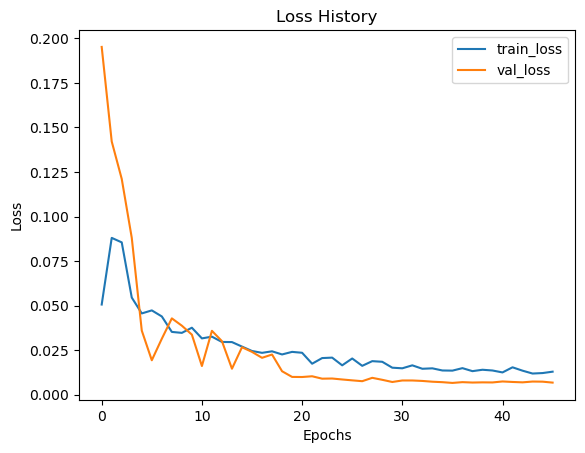

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

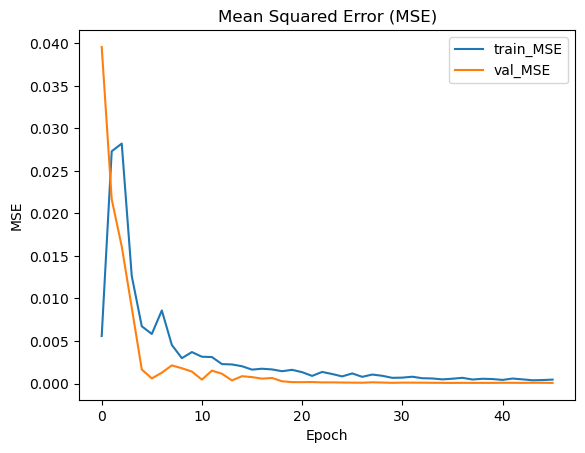

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

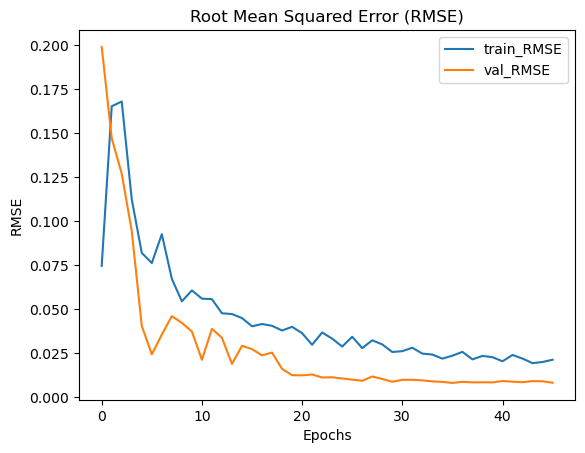

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

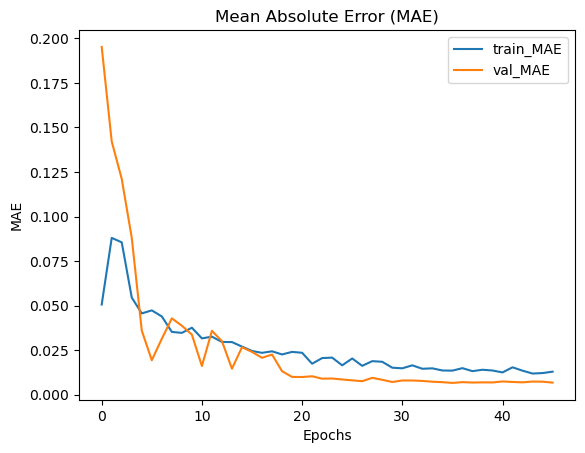

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

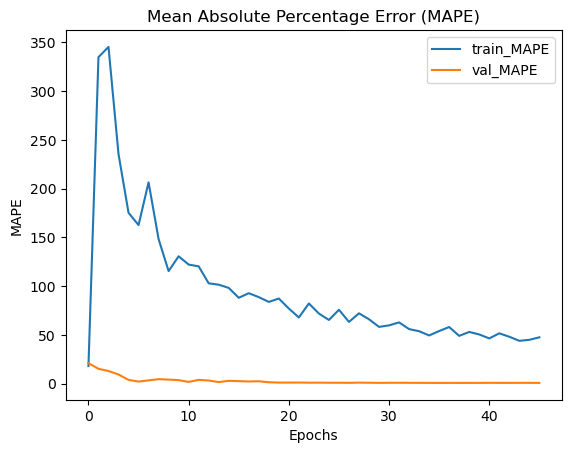

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:39:50.517782: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


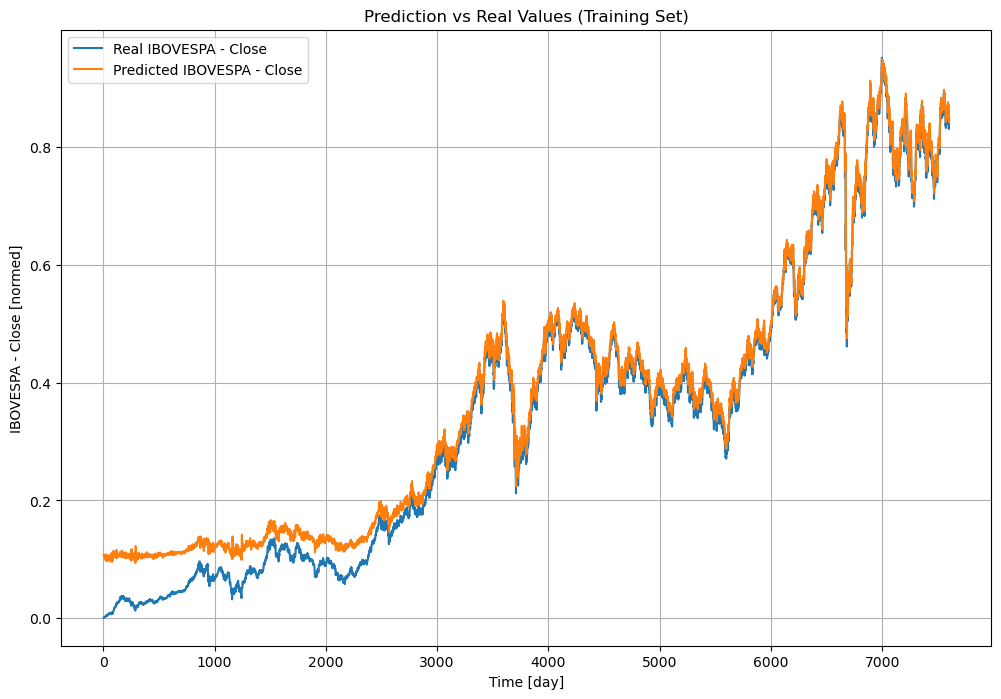

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


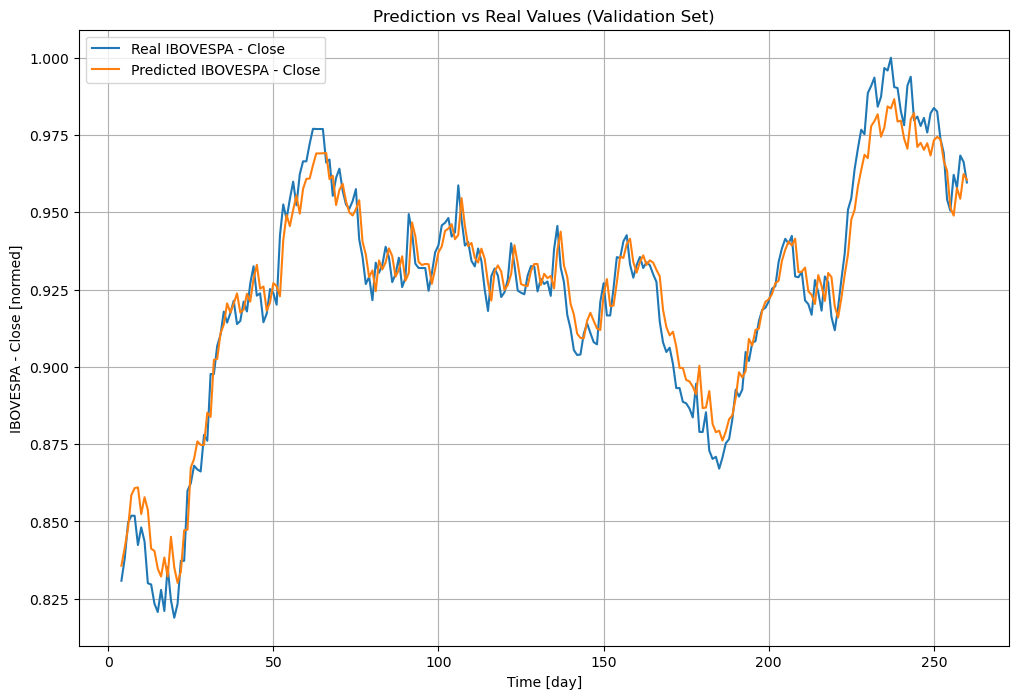

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


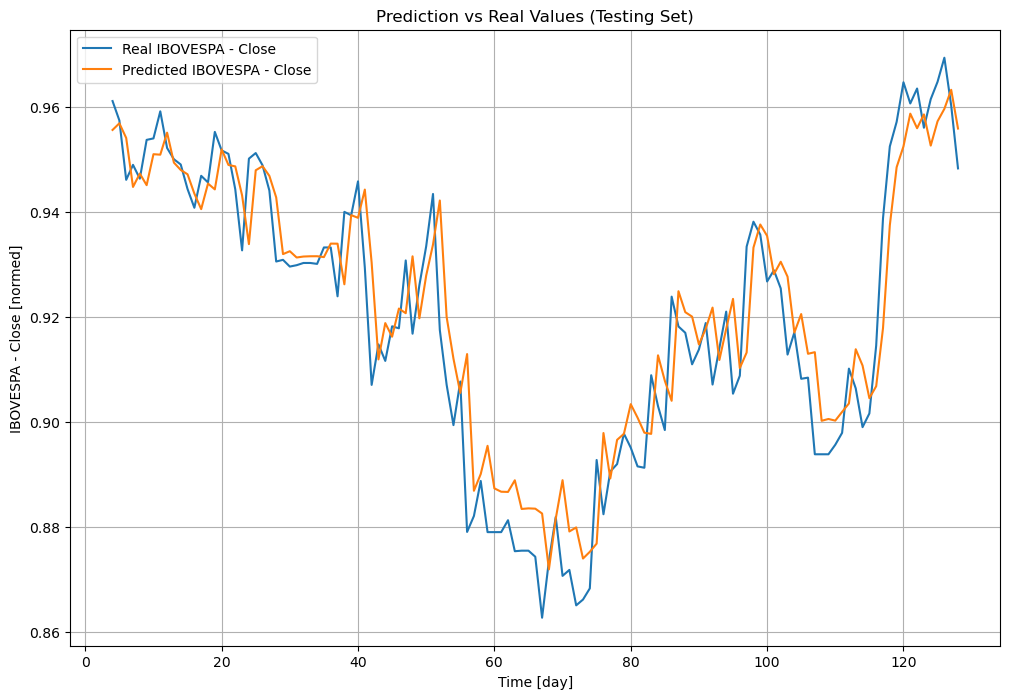

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

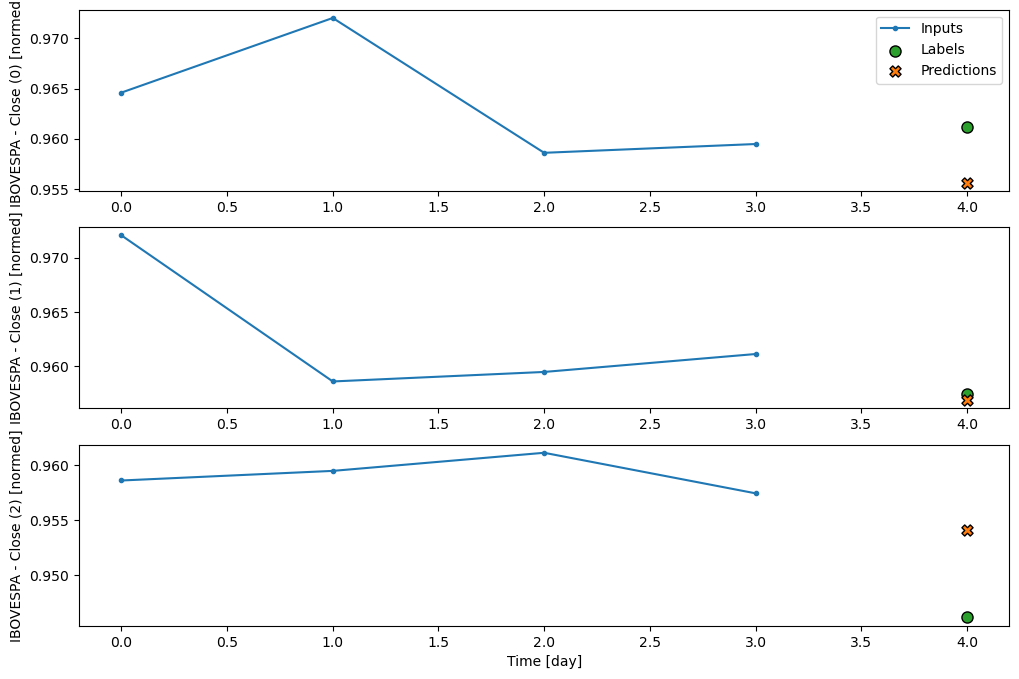

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:42s:175ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


array([[[0.9556086 , 0.9556086 , 0.9556086 , ..., 0.9556086 ,
         0.9556086 , 0.9556086 ]],

       [[0.95687306, 0.95687306, 0.95687306, ..., 0.95687306,
         0.95687306, 0.95687306]],

       [[0.95408463, 0.95408463, 0.95408463, ..., 0.95408463,
         0.95408463, 0.95408463]],

       ...,

       [[0.95962894, 0.95962894, 0.95962894, ..., 0.95962894,
         0.95962894, 0.95962894]],

       [[0.9632618 , 0.9632618 , 0.9632618 , ..., 0.9632618 ,
         0.9632618 , 0.9632618 ]],

       [[0.9558743 , 0.9558743 , 0.9558743 , ..., 0.9558743 ,
         0.9558743 , 0.9558743 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')